In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("seattleWeather_1948-2017.csv")

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler = StandardScaler()

In [5]:
data = raw_data.drop("DATE",axis=1)
data["TAVG"]=(data["TMAX"]+data["TMIN"])/2
data =  data.drop("PRCP", axis=1)
data = data.drop("RAIN", axis=1)
data

,TMAX,TMIN,TAVG
0,51,42,46.5
1,45,36,40.5
2,45,35,40.0
3,45,34,39.5
4,45,32,38.5
...,...,...,...
25546,49,34,41.5
25547,49,29,39.0
25548,46,32,39.0
25549,48,34,41.0


In [6]:
tmin = data.drop("TMAX", axis=1)
tmin = tmin.drop("TAVG", axis=1)
tmin

,TMIN
0,42
1,36
2,35
3,34
4,32
...,...
25546,34
25547,29
25548,32
25549,34


In [7]:
scaler.fit(tmin)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
pred_min = np.load("Min_Temp_pred_2.npy")
y_min = np.load("Min_Temp_y_2.npy")

In [9]:
pred_min_scl = scaler.inverse_transform(pred_min)
y_min_scl = scaler.inverse_transform(y_min)

In [12]:
def cel(data):
    resul = (data-32)/1.8
    return resul

In [13]:
pred_min_cel = cel(pred_min_scl)
y_min_cel = cel(y_min_scl)

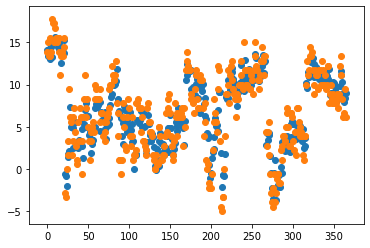

In [34]:
plt.scatter(range(365),pred_min_cel.reshape(-1,1)[-365:])
plt.scatter(range(365), y_min_cel.reshape(-1,1)[-365:])
plt.show()

In [29]:
error = pred_min_cel.reshape(-1,1)-y_min_cel.reshape(-1,1)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   5.,   0.,  11.,
          5.,  16.,  21.,  27.,  26.,  58.,  51.,  71.,  95., 117., 112.,
        168., 184., 252., 265., 308., 341., 337., 349., 326., 282., 280.,
        261., 221., 183., 143., 124.,  89.,  57.,  51.,  26.,  24.,  18.,
          9.,  11.,   6.,   7.,   3.,   4.]),
 array([-9.3995262 , -9.07931131, -8.75909642, -8.43888154, -8.11866665,
        -7.79845176, -7.47823687, -7.15802198, -6.8378071 , -6.51759221,
        -6.19737732, -5.87716243, -5.55694755, -5.23673266, -4.91651777,
        -4.59630288, -4.276088  , -3.95587311, -3.63565822, -3.31544333,
        -2.99522844, -2.67501356, -2.35479867, -2.03458378, -1.71436889,
        -1.39415401, -1.07393912, -0.75372423, -0.43350934, -0.11329445,
         0.20692043,  0.52713532,  0.84735021,  1.1675651 ,  1.48777998,
         1.80799487,  2.12820976,  2.44842465,  2.76863953,  3.08885442,
         3.40906931,  3.7292842 ,  4.04949909,  4.36971397,  4.68992886,
 

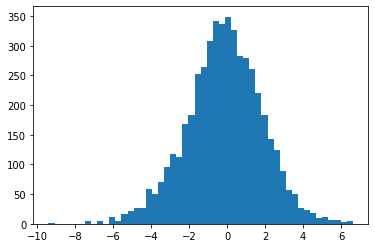

In [30]:
plt.hist(error,bins=50)

(array([  4.,   3.,   5.,   3.,  10.,   8.,  16.,  11.,  16.,  12.,  27.,
         43.,  46.,  53.,  60.,  85., 107., 130., 105., 144., 146., 148.,
        150., 149., 151., 151., 165., 150., 155., 150., 107.,  90., 100.,
        104., 105., 123., 143., 154., 145., 167., 138., 177., 164., 189.,
        199., 185., 102.,  94.,  49.,  11.]),
 array([-5.5701776 , -5.134307  , -4.6984363 , -4.2625656 , -3.8266947 ,
        -3.390824  , -2.9549532 , -2.5190825 , -2.083212  , -1.6473411 ,
        -1.2114704 , -0.7755997 , -0.33972898,  0.09614173,  0.53201246,
         0.96788317,  1.4037539 ,  1.8396246 ,  2.2754953 ,  2.711366  ,
         3.1472368 ,  3.5831075 ,  4.018978  ,  4.454849  ,  4.8907194 ,
         5.3265905 ,  5.762461  ,  6.198332  ,  6.6342025 ,  7.070073  ,
         7.505944  ,  7.9418144 ,  8.377686  ,  8.813556  ,  9.249427  ,
         9.685297  , 10.121168  , 10.557039  , 10.992909  , 11.428781  ,
        11.864651  , 12.300522  , 12.736392  , 13.172263  , 13.608134  ,
 

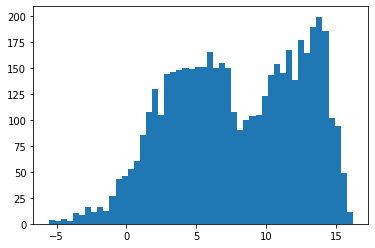

In [35]:
plt.hist(pred_min_cel.reshape(-1,1),bins=50)

(array([  4.,   6.,   7.,   4.,  10.,   8.,  16.,  17.,  31.,  38.,  30.,
         31.,  50.,  61.,  94., 111., 118.,  86., 150., 151., 159., 163.,
        140., 168., 219., 175., 199., 161., 169., 180., 160., 222., 133.,
        194., 193., 176., 174., 201., 182., 159., 128.,  84.,  56.,  47.,
         35.,  25.,  16.,   2.,   0.,   6.]),
 array([-7.22222222e+00, -6.66666667e+00, -6.11111111e+00, -5.55555556e+00,
        -5.00000000e+00, -4.44444444e+00, -3.88888889e+00, -3.33333333e+00,
        -2.77777778e+00, -2.22222222e+00, -1.66666667e+00, -1.11111111e+00,
        -5.55555556e-01, -8.88178420e-16,  5.55555556e-01,  1.11111111e+00,
         1.66666667e+00,  2.22222222e+00,  2.77777778e+00,  3.33333333e+00,
         3.88888889e+00,  4.44444444e+00,  5.00000000e+00,  5.55555556e+00,
         6.11111111e+00,  6.66666667e+00,  7.22222222e+00,  7.77777778e+00,
         8.33333333e+00,  8.88888889e+00,  9.44444444e+00,  1.00000000e+01,
         1.05555556e+01,  1.11111111e+01,  1.16666

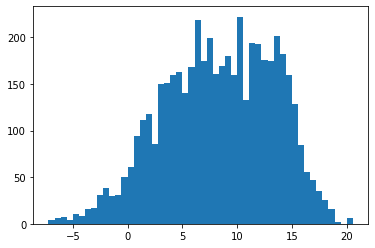

In [36]:
plt.hist(y_min_cel.reshape(-1,1),bins=50)